In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [17]:
#load dataset
data = pd.read_csv(r"C:\Users\Tuhin\OneDrive\Desktop\Kaggle Stock Market Analysis\stocks.csv")
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [18]:
#copy data
df = data.copy()
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [19]:
#checking null value
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
#checking duplicate value 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool

In [21]:
#convert text to date column
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
#shorting the date column 
df = df.sort_values('Date')

In [23]:
#intialize column close data
close_data = df[['Close']].values


In [24]:
# Step 2: Scale the Close prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_data)

In [25]:
# Step 3: Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i-sequence_length:i, 0])
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [26]:
# Step 4: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Step 5: Train the model
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.3069
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1172 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1094 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1159 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1098 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.1063 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1145 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1093 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1088 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1094 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1049 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1030 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1097 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1122 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1097 
Epoch 16/50
6/6 ━━━━

In [30]:
# Step 6: Predict the next 7 days
last_sequence = scaled_close[-sequence_length:]
predicted_scaled = []
current_seq = last_sequence.reshape(1, sequence_length, 1)

for _ in range(7):
    next_price = model.predict(current_seq, verbose=0)[0][0]
    predicted_scaled.append(next_price)
    # Update current_seq by appending next prediction and removing oldest
    current_seq = np.append(current_seq[:, 1:, :], [[[next_price]]], axis=1)

# Step 7: Inverse transform the predictions
predicted_scaled = np.array(predicted_scaled).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_scaled)


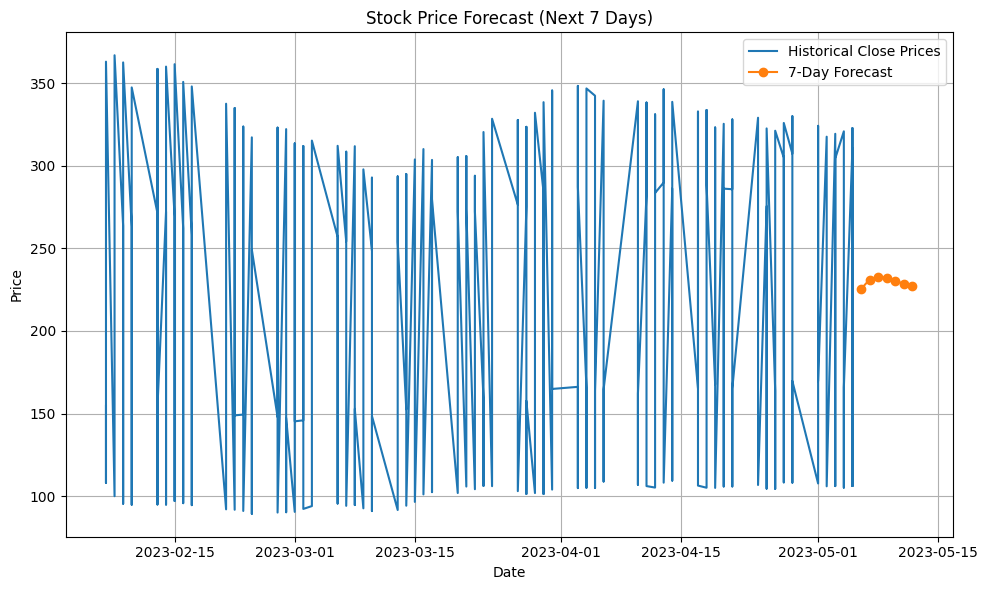

In [31]:
# Step 8: Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices')
future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
plt.plot(future_dates, predicted_prices, marker='o', label='7-Day Forecast')
plt.title('Stock Price Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()